<a href="https://colab.research.google.com/github/Adnner-Esperilla-DEV/Programacion_101/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definición de los items y la capacidad de la mochila

Resultados:

Tamaño: 100
Simulated Annealing -> Mejor Valor: 3971, Tiempo: 0.1806 segundos
Hill Climbing -> Mejor Valor: 4024, Tiempo: 0.1154 segundos

Tamaño: 500
Simulated Annealing -> Mejor Valor: 17397, Tiempo: 0.6100 segundos
Hill Climbing -> Mejor Valor: 17657, Tiempo: 9.0524 segundos

Tamaño: 1000
Simulated Annealing -> Mejor Valor: 34700, Tiempo: 1.5979 segundos
Hill Climbing -> Mejor Valor: 38777, Tiempo: 50.0647 segundos


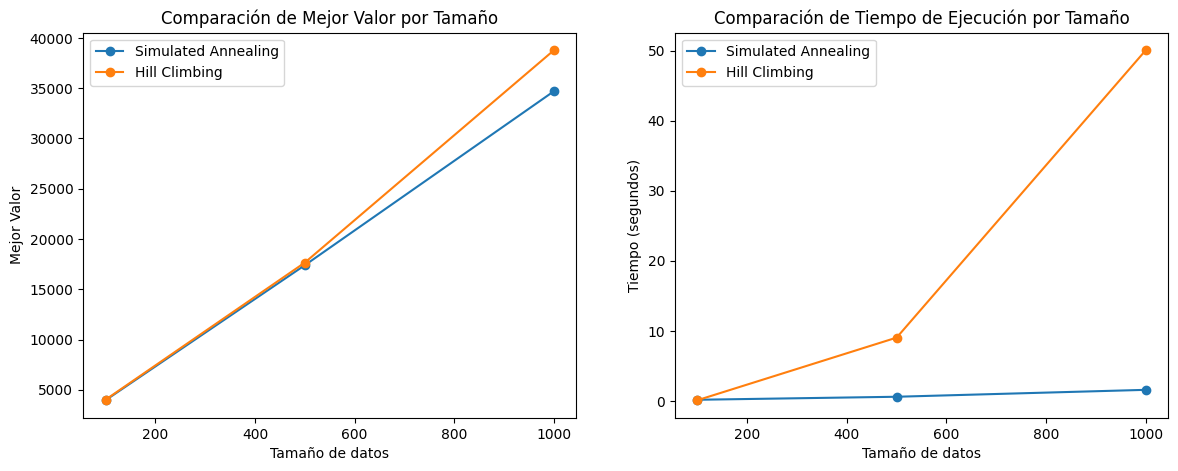

In [1]:
import random
import math
import time
import matplotlib.pyplot as plt

# Función para inicializar los items
def generar_items(cantidad):
    listaDeValores = [random.randint(10, 100) for _ in range(cantidad)]
    listaDePesos = [random.randint(1, 10) for _ in range(cantidad)]
    items = [{'valor': listaDeValores[i], 'peso': listaDePesos[i]} for i in range(cantidad)]
    capacidad_mochila = int(sum(listaDePesos) * 0.6)
    return items, listaDeValores, listaDePesos, capacidad_mochila

# Función de evaluación común
def evaluarSolucion(solucion, items, capacidad_mochila):
    valorTotal = sum(items[i]['valor'] for i in range(len(solucion)) if solucion[i] == 1)
    pesoTotal = sum(items[i]['peso'] for i in range(len(solucion)) if solucion[i] == 1)
    return valorTotal if pesoTotal <= capacidad_mochila else 0

# Simulated Annealing
def simulated_annealing(items, capacidad_mochila):
    solucionActual = [random.choice([0, 1]) for _ in items]
    valorActual = evaluarSolucion(solucionActual, items, capacidad_mochila)
    T, T_min, alpha = 1000, 0.0001, 0.99
    mejorValor = valorActual

    while T > T_min:
        nuevaSolucion = solucionActual[:]
        i = random.randint(0, len(items) - 1)
        nuevaSolucion[i] = 1 if nuevaSolucion[i] == 0 else 0
        nuevoValor = evaluarSolucion(nuevaSolucion, items, capacidad_mochila)
        delta = nuevoValor - valorActual
        if delta > 0 or random.random() < math.exp(delta / T):
            solucionActual = nuevaSolucion[:]
            valorActual = nuevoValor
        mejorValor = max(mejorValor, valorActual)
        T *= alpha

    return mejorValor

# Hill Climbing
def hill_climbing(items, listaDeValores, listaDePesos, capacidad_mochila):
    solucion = [random.choice([0, 1]) for _ in listaDePesos]
    mejor_fitness = evaluarSolucion(solucion, items, capacidad_mochila)

    while True:
        vecinos = [solucion[:]]
        for i in range(len(solucion)):
            vecino = solucion[:]
            vecino[i] = 1 - vecino[i]
            vecinos.append(vecino)

        mejor_vecino = max(vecinos, key=lambda x: evaluarSolucion(x, items, capacidad_mochila))
        fitness_mejor_vecino = evaluarSolucion(mejor_vecino, items, capacidad_mochila)

        if fitness_mejor_vecino > mejor_fitness:
            solucion = mejor_vecino
            mejor_fitness = fitness_mejor_vecino
        else:
            break

    return mejor_fitness

# Ejecutar ambos algoritmos con diferentes tamaños y medir tiempos
tamanos = [100, 500, 1000]
resultados_annealing = []
resultados_climbing = []
tiempos_annealing = []
tiempos_climbing = []

for tamano in tamanos:
    items, listaDeValores, listaDePesos, capacidad_mochila = generar_items(tamano)

    # Simulated Annealing
    start_time = time.time()
    mejor_valor_annealing = simulated_annealing(items, capacidad_mochila)
    end_time = time.time()
    resultados_annealing.append(mejor_valor_annealing)
    tiempos_annealing.append(end_time - start_time)

    # Hill Climbing
    start_time = time.time()
    mejor_valor_climbing = hill_climbing(items, listaDeValores, listaDePesos, capacidad_mochila)
    end_time = time.time()
    resultados_climbing.append(mejor_valor_climbing)
    tiempos_climbing.append(end_time - start_time)

# Mostrar resultados
print("Resultados:")
for i, tamano in enumerate(tamanos):
    print(f"\nTamaño: {tamano}")
    print(f"Simulated Annealing -> Mejor Valor: {resultados_annealing[i]}, Tiempo: {tiempos_annealing[i]:.4f} segundos")
    print(f"Hill Climbing -> Mejor Valor: {resultados_climbing[i]}, Tiempo: {tiempos_climbing[i]:.4f} segundos")

# Graficar resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de Mejores Valores
ax1.plot(tamanos, resultados_annealing, label="Simulated Annealing", marker='o')
ax1.plot(tamanos, resultados_climbing, label="Hill Climbing", marker='o')
ax1.set_xlabel("Tamaño de datos")
ax1.set_ylabel("Mejor Valor")
ax1.set_title("Comparación de Mejor Valor por Tamaño")
ax1.legend()

# Gráfico de Tiempos
ax2.plot(tamanos, tiempos_annealing, label="Simulated Annealing", marker='o')
ax2.plot(tamanos, tiempos_climbing, label="Hill Climbing", marker='o')
ax2.set_xlabel("Tamaño de datos")
ax2.set_ylabel("Tiempo (segundos)")
ax2.set_title("Comparación de Tiempo de Ejecución por Tamaño")
ax2.legend()

plt.show()
